# MALARIA IN AFRICA (2007-2017)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control display of seaborn data 
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

**DATASET BEFORE CLEANING.**

In [2]:
# Loading the dataset
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**ANALYZING THE DATASET.**

In [3]:
# Checking shape of data (rows, columns)
df.shape

(594, 27)

In [4]:
# Checking column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [5]:
# Checking data types
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [6]:
# Checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [7]:
# Check null values
df.isnull().sum().sort_values(ascending = False)

People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water services (% of population)                      495
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed sanitation services, rural (% of rural population)             484
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
People using safely managed sanitation services, urban  (% of urban population)            462
People using safely managed sanitation services (% of population)                          462
Use of insecticide-treated bed nets (% of under-5 population)                              462
People using safely managed drinking water services, urban (% of urban population)         418
Malaria cases reported                                                                      44
Incidence of malaria (per 1,000 population at risk

In [8]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [9]:
""" 
I filled both the malaria cases reported and incidence of malaria columns with 0s because the two columns each has 44 nulls , 
since each country appears 11 times, there are 4 countries with nulls throughout the 11 years. Therefore I couldn't calculate the mean.
Also I could not just assume any value to be filled in all the 11 spaces for each country. 
"""
df['Malaria cases reported'].fillna(0, inplace=True)
df['Incidence of malaria (per 1,000 population at risk)'].fillna(0, inplace=True)

**Confirmation that the two columns now have no nulls.**

In [10]:
df['Malaria cases reported'].isnull().sum()

0

In [11]:
df['Incidence of malaria (per 1,000 population at risk)'].isnull().sum()

0

**Handling nulls by filling the missing values with the mean of the rows that have data for each particular country.**

In [12]:
eritrea_means = df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
eritrea_data_rows = df.loc[df['Country Name'] == 'Eritrea'].dropna(subset=['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)','Rural population (% of total population)', 'Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(eritrea_means)

In [13]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(sudan_means)

In [14]:
car_means = df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
car_data_rows = df.loc[df['Country Name'] == 'Central African Republic'].dropna(subset=['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(car_means)

I filled the remaining nulls available with zero because the columns still having nulls have over 75% of the data with nulls.
Calculating mean like the code earlier would give nulls, since for some particular countries, all the 11 times they appear have nulls.

In [15]:
# Replace NaN with zero
df.fillna(0, inplace=True)

**Confirmation that all columns now have no nulls.**

In [16]:
df.isnull().sum().sort_values(ascending = False) 

Country Name                                                                               0
Rural population (% of total population)                                                   0
longitude                                                                                  0
latitude                                                                                   0
People using at least basic sanitation services, urban  (% of urban population)            0
People using at least basic sanitation services, rural (% of rural population)             0
People using at least basic sanitation services (% of population)                          0
People using at least basic drinking water services, urban (% of urban population)         0
People using at least basic drinking water services, rural (% of rural population)         0
People using at least basic drinking water services (% of population)                      0
Urban population growth (annual %)                                    

In [17]:
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

**Changing the data type of the malaria cases reported to int.**

In [18]:
df['Malaria cases reported'] = df['Malaria cases reported'].astype('int')

**Analyze the reported number of malaria cases to understand the burden of malaria in different countries and over time.**

In [19]:
# Filter out Year and Malaria cases reported.
malaria_cases = df[['Year', 'Malaria cases reported']]
malaria_cases

,Year,Malaria cases reported
0,2007,26
1,2007,1533485
2,2007,0
3,2007,390
4,2007,44246
...,...,...
589,2017,1755577
590,2017,0
591,2017,11667831
592,2017,5505639


In [20]:
# Get total malaria cases per year and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: maroon' if cell else '' for cell in is_min]

totalmalaria_cases = malaria_cases.groupby('Year').sum()

totalmalaria_cases.style.apply(highlight_max)

,Malaria cases reported
Year,
2007,10102341
2008,9508374
2009,14414616
2010,22184760
2011,23002865
2012,39719221
2013,47174959
2014,77028814
2015,92968526


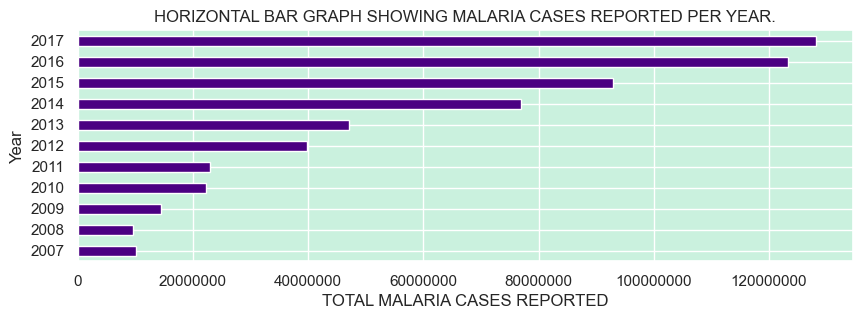

In [21]:
malaria_cases_bar = totalmalaria_cases.plot(kind='barh', align='center', figsize=(10,3), color='indigo', legend =False,
                            title="HORIZONTAL BAR GRAPH SHOWING MALARIA CASES REPORTED PER YEAR.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel('TOTAL MALARIA CASES REPORTED')

# Display the plot
plt.show()

Changing the Incidences of Malaria data into an int so that it can be uniform and easy to plot

Studying the Incidence of malaria (per 1,000 population at risk) inorder to show the varies changes over the different years, hence to see the level of change across the years

In [22]:
# Filter out Year and Incidences of Malaria inorder to get the variables that will be ploted
malaria_incidences = df[['Year', 'Incidence of malaria (per 1,000 population at risk)']]
malaria_incidences

,Year,"Incidence of malaria (per 1,000 population at risk)"
0,2007,0.01
1,2007,286.72
2,2007,480.24
3,2007,1.03
4,2007,503.80
...,...,...
589,2017,278.20
590,2017,0.00
591,2017,336.76
592,2017,160.05


Getting the sum of all Malaria Inncidences across the different years

In [23]:
# Get total malaria incidences and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

sum_malaria_incidence = malaria_incidences.groupby('Year').sum()

sum_malaria_incidence.style.apply(highlight_max)

,"Incidence of malaria (per 1,000 population at risk)"
Year,
2007,10508.390000
2008,10212.690000
2009,10139.550000
2010,9953.840000
2011,9583.180000
2012,9460.270000
2013,9256.110000
2014,8836.920000
2015,8837.110000


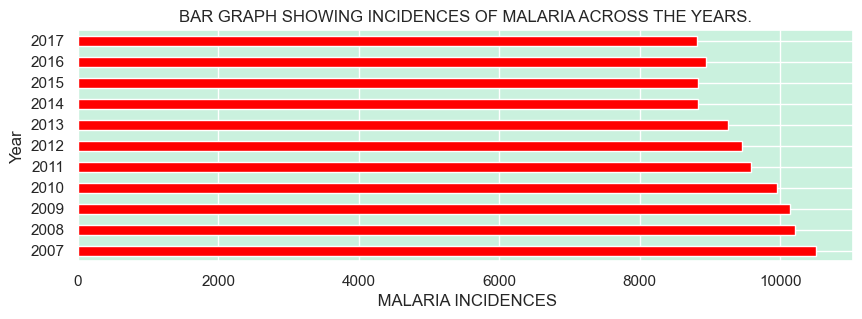

In [24]:
malaria_incidence_bar = sum_malaria_incidence.plot(kind='barh', align='center', figsize=(10,3), color='red', legend =False,
                            title="BAR GRAPH SHOWING INCIDENCES OF MALARIA ACROSS THE YEARS.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel(' MALARIA INCIDENCES')

# Display the plot
plt.show()

Showing Incidences of Malaria Across the Years using a Line Graph

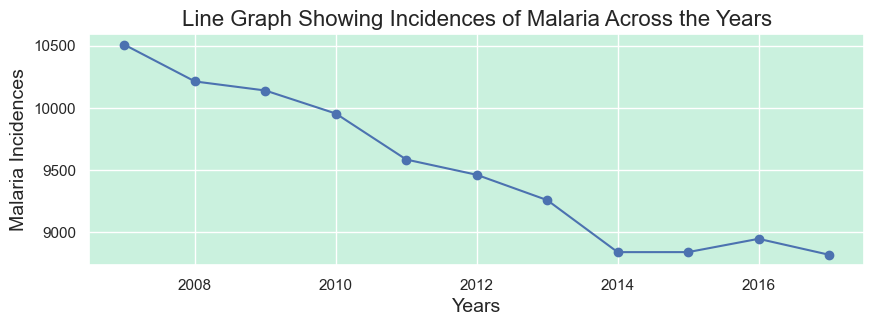

In [25]:
import matplotlib.pyplot as plt

# Ensure that plots are displayed directly in the notebook
%matplotlib inline

# Assuming you have a Series or DataFrame named 'sum_malaria_incidence' containing malaria incidences over the years

# Create a line graph
plt.figure(figsize=(10, 3))

# Plot the line graph
plt.plot(sum_malaria_incidence.index, sum_malaria_incidence.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Malaria Incidences', fontsize=14)
plt.title('Line Graph Showing Incidences of Malaria Across the Years', fontsize=16)

# Display the plot
plt.grid(True)  # Add grid lines to the plot (optional)
plt.show()


Simple Pie chart showing the years in which the malaria data was collected

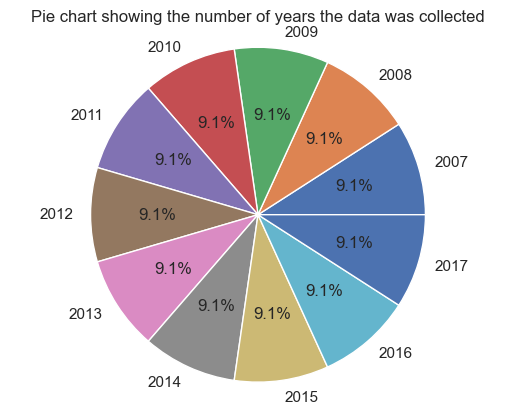

In [26]:
# Count the frequency of each political party
years = df['Year'].value_counts()

# Create the pie chart
plt.pie(years, labels=years.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie chart showing the number of years the data was collected')
plt.show()

Studying the Rural Population Growth to show the rate of growth over the years 

In [27]:
rural_population = df[['Year', 'Rural population growth (annual %)']]
rural_population 

,Year,Rural population growth (annual %)
0,2007,-0.60
1,2007,1.91
2,2007,1.99
3,2007,-1.44
4,2007,2.16
...,...,...
589,2017,1.58
590,2017,0.20
591,2017,3.01
592,2017,2.01


Getting total rural population growth and highlighting a year with high growth number

In [28]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

rural_growth = rural_population.groupby('Year').sum()

rural_growth.style.apply(highlight_max)

,Rural population growth (annual %)
Year,
2007,86.140000
2008,79.490000
2009,76.210000
2010,75.640000
2011,67.840000
2012,73.126000
2013,75.406000
2014,73.676000
2015,73.206000


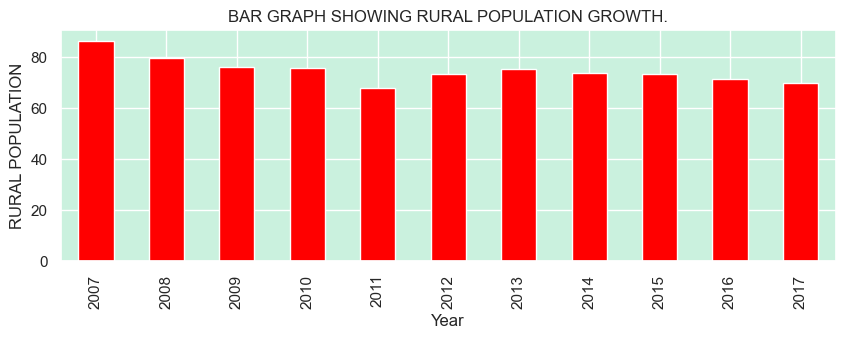

In [29]:
import matplotlib.pyplot as plt

# Assuming you have a Series or DataFrame named 'population' containing total malaria incidences

rural_population_growth_bar = rural_growth.plot(kind='bar', align='center', figsize=(10, 3), color='red', legend=False,
                                       title="BAR GRAPH SHOWING RURAL POPULATION GROWTH.")

# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Set y-axis label
plt.ylabel('RURAL POPULATION')

# Display the plot
plt.show()


A line graph showing the Rural Population Growth over the Years

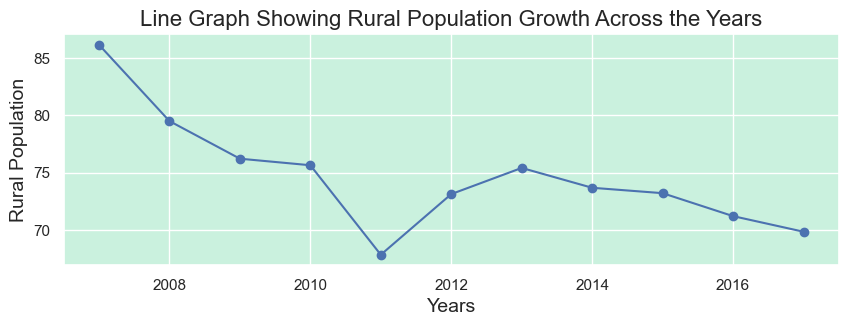

In [30]:
import matplotlib.pyplot as plt

# Ensure that plots are displayed directly in the notebook
%matplotlib inline

# Assuming you have a Series or DataFrame named 'sum_malaria_incidence' containing malaria incidences over the years

# Create a line graph
plt.figure(figsize=(10, 3))

# Plot the line graph
plt.plot(rural_growth.index, rural_growth.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Rural Population', fontsize=14)
plt.title('Line Graph Showing Rural Population Growth Across the Years', fontsize=16)

# Display the plot
plt.grid(True) 
plt.show()


Studying the Urban Population Growth to show the rate of growth over the years

In [31]:
urban_population = df[['Year', 'Urban population growth (annual %)']]
urban_population

,Year,Urban population growth (annual %)
0,2007,2.71
1,2007,5.01
2,2007,4.09
3,2007,4.80
4,2007,5.91
...,...,...
589,2017,3.79
590,2017,1.57
591,2017,6.25
592,2017,4.21


Getting total urban population growth and highlighting a year with high growth number

In [32]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

urban_growth = urban_population.groupby('Year').sum()

urban_growth.style.apply(highlight_max)

,Urban population growth (annual %)
Year,
2007,186.860000
2008,203.070000
2009,198.310000
2010,198.630000
2011,190.410000
2012,189.166000
2013,186.996000
2014,186.086000
2015,186.486000


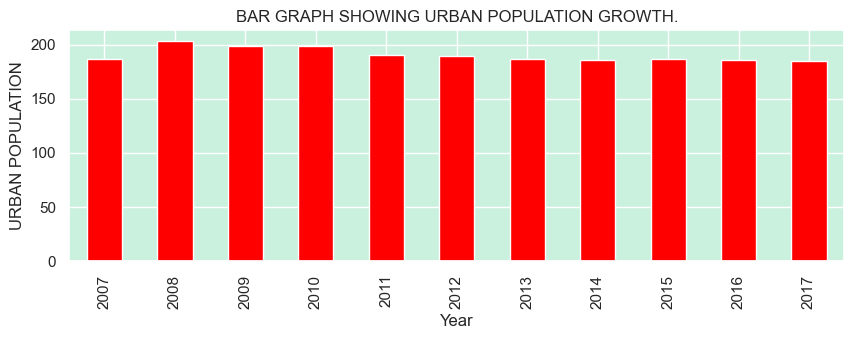

In [33]:
import matplotlib.pyplot as plt

# Assuming you have a Series or DataFrame named 'population' containing total malaria incidences

urban_population_growth_bar = urban_growth.plot(kind='bar', align='center', figsize=(10, 3), color='red', legend=False,
                                       title="BAR GRAPH SHOWING URBAN POPULATION GROWTH.")

# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Set y-axis label
plt.ylabel('URBAN POPULATION')

# Display the plot
plt.show()

A line graph showing the Urban Population Growth over the Years

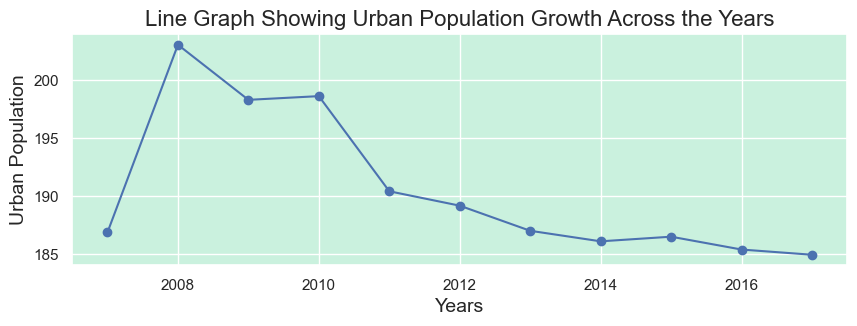

In [34]:
import matplotlib.pyplot as plt

# Ensure that plots are displayed directly in the notebook
%matplotlib inline

# Assuming you have a Series or DataFrame named 'sum_malaria_incidence' containing malaria incidences over the years

# Create a line graph
plt.figure(figsize=(10, 3))

# Plot the line graph
plt.plot(urban_growth.index, urban_growth.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Urban Population', fontsize=14)
plt.title('Line Graph Showing Urban Population Growth Across the Years', fontsize=16)

# Display the plot
plt.grid(True) 
plt.show()

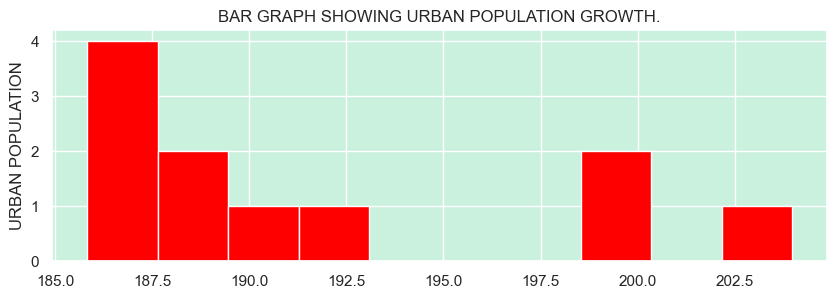

In [35]:
import matplotlib.pyplot as plt

# Assuming you have a Series or DataFrame named 'population' containing total malaria incidences

urban_population_growth_bar = urban_growth.plot(kind='hist', align='right', figsize=(10, 3), color='red', legend=False,
                                       title="BAR GRAPH SHOWING URBAN POPULATION GROWTH.")

# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Set y-axis label
plt.ylabel('URBAN POPULATION')

# Display the plot
plt.show()


In [36]:
correlation = df[['People using at least basic sanitation services, urban  (% of urban population)',
                  'People using at least basic sanitation services, rural (% of rural population)', 
                  'People using at least basic sanitation services (% of population)', 
                  'People using at least basic drinking water services, urban (% of urban population)', 
                  'People using at least basic drinking water services, rural (% of rural population)', 
                  'People using at least basic drinking water services (% of population)', 
                  'Rural population (% of total population)', 
                  'Rural population growth (annual %)',
                  'Urban population (% of total population)', 
                  'Urban population growth (annual %)',
                  'Malaria cases reported', 
                  'Incidence of malaria (per 1,000 population at risk)', 
                  'Year',
                  'Country Name']]

In [37]:
correlation_matrix = correlation.corr()

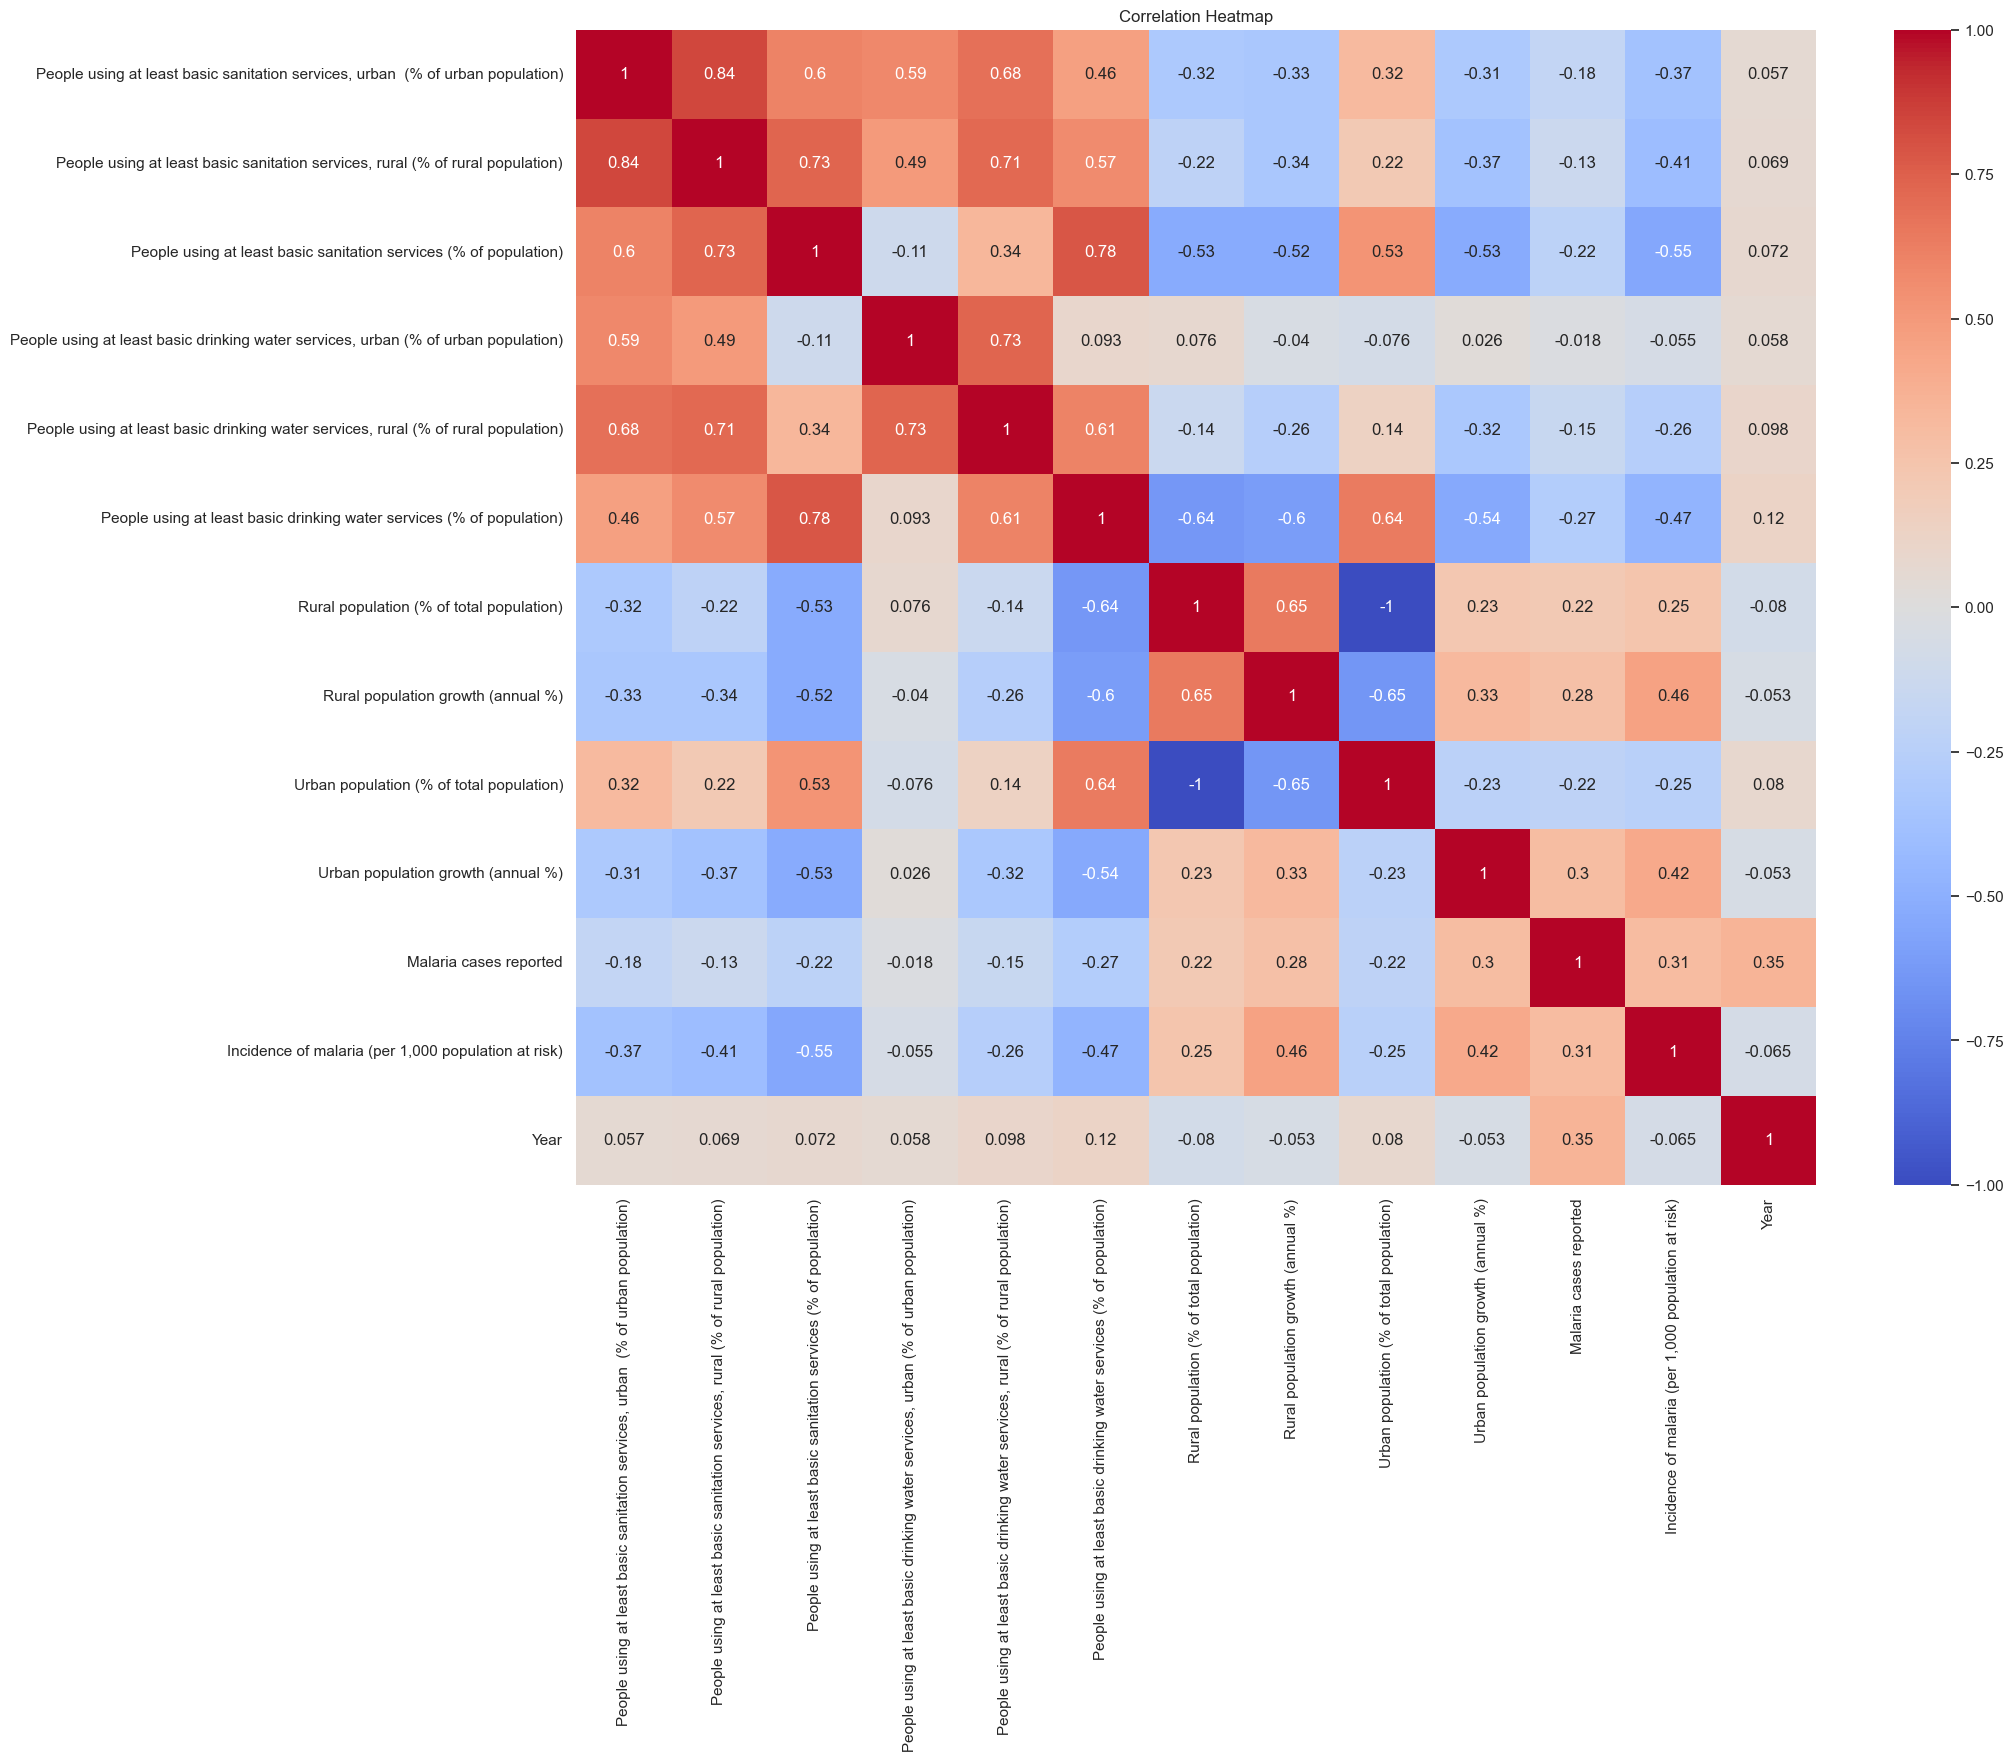

In [38]:
# Create a heatmap using seaborn
plt.figure(figsize=(20,15))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Studying the Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women) column to visual the objectives

In [39]:
ipt= df[['Country Name', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']]
ipt

,Country Name,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Algeria,0.0
1,Angola,1.5
2,Benin,0.0
3,Botswana,0.0
4,Burkina Faso,0.0
...,...,...
589,Togo,41.7
590,Tunisia,0.0
591,Uganda,0.0
592,Zambia,0.0


In [40]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

IPT = ipt.groupby('Country Name').sum()

IPT.style.apply(highlight_max)

,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
Country Name,
Algeria,0.000000
Angola,48.900000
Benin,22.500000
Botswana,0.000000
Burkina Faso,27.600000
Burundi,25.800000
Cabo Verde,0.000000
Cameroon,38.000000
Central African Republic,13.582707


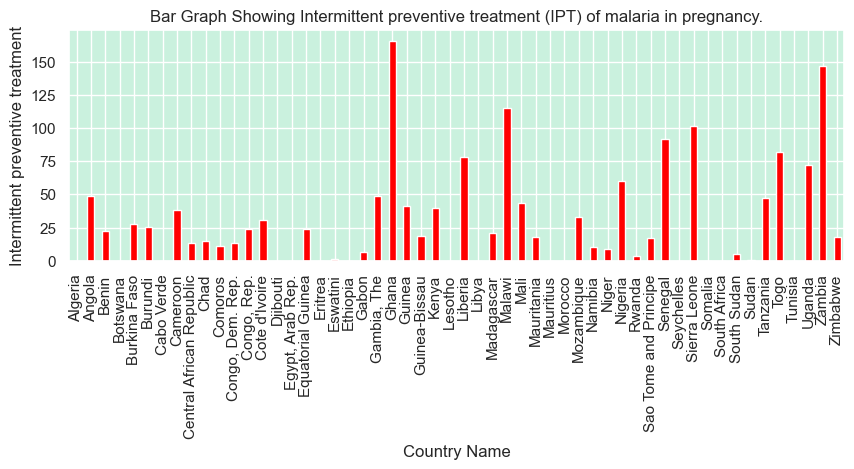

In [41]:
# Assuming you have a Series or DataFrame named 'population' containing total malaria incidences

pregrant = IPT.plot(kind='bar', align='center', figsize=(10, 3), color='red', legend=False,
                                       title="Bar Graph Showing Intermittent preventive treatment (IPT) of malaria in pregnancy.")
# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Set y-axis label
plt.ylabel('Intermittent preventive treatment')

# Display the plot
plt.show()

A Line Graph showing Intermittent preventive treatment over the years 

In [43]:
ipt= df[['Year', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']]
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

IPT = ipt.groupby('Year').sum()

IPT.style.apply(highlight_max)

,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
Year,
2007,56.600000
2008,47.100000
2009,64.200000
2010,98.530603
2011,165.803228
2012,148.160453
2013,75.100000
2014,241.985314
2015,178.200000


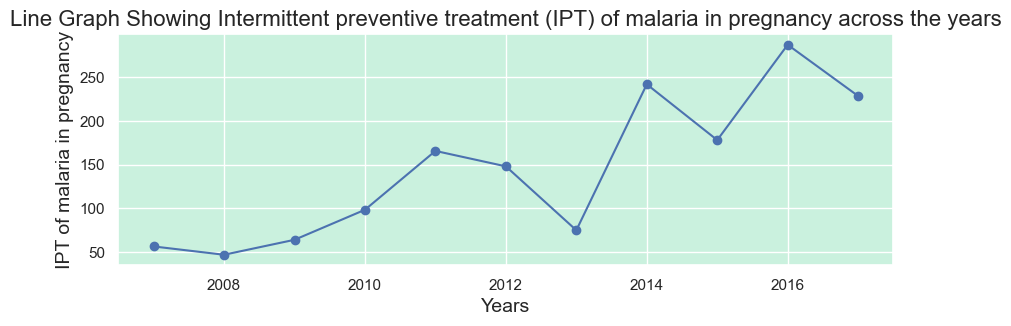

In [46]:
import matplotlib.pyplot as plt

# Ensure that plots are displayed directly in the notebook
%matplotlib inline

# Create a line graph
plt.figure(figsize=(10, 3))

# Plot the line graph
plt.plot(IPT.index, IPT.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('IPT of malaria in pregnancy', fontsize=14)
plt.title('Line Graph Showing Intermittent preventive treatment (IPT) of malaria in pregnancy across the years', fontsize=16)

# Display the plot
plt.grid(True) 
plt.show()

Studying the Children with fever receiving antimalarial drugs (% of children under age 5 with fever) column to visual the objectives

In [49]:
children= df[['Country Name', 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)']]
children

,Country Name,Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
0,Algeria,0.0
1,Angola,29.8
2,Benin,0.0
3,Botswana,0.0
4,Burkina Faso,0.0
...,...,...
589,Togo,31.1
590,Tunisia,0.0
591,Uganda,0.0
592,Zambia,0.0


In [50]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

child = children.groupby('Country Name').sum()

child.style.apply(highlight_max)

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
Country Name,
Algeria,0.000000
Angola,76.200000
Benin,64.300000
Botswana,0.000000
Burkina Faso,84.300000
Burundi,89.600000
Cabo Verde,0.000000
Cameroon,61.300000
Central African Republic,34.100000


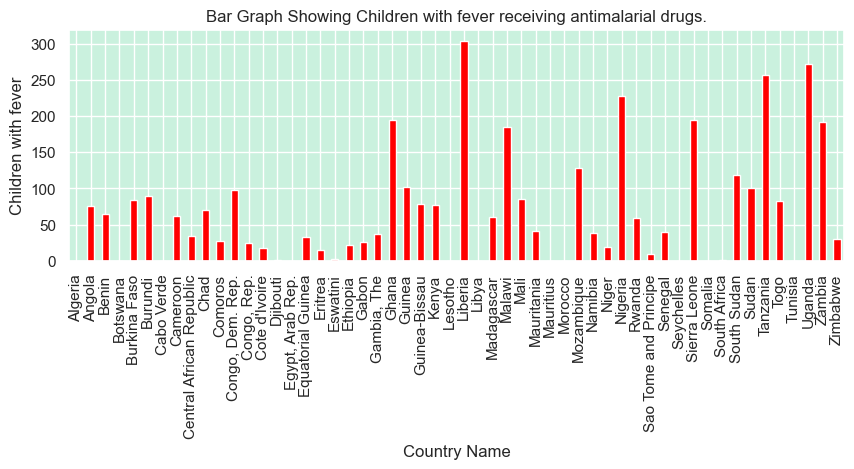

In [51]:
# Assuming you have a Series or DataFrame named 'population' containing total malaria incidences

childrens = child.plot(kind='bar', align='center', figsize=(10, 3), color='red', legend=False,
                                       title="Bar Graph Showing Children with fever receiving antimalarial drugs.")
# Remove scientific notation from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Set y-axis label
plt.ylabel('Children with fever')

# Display the plot
plt.show()

Line Graph Showing Children with fever receiving antimalarial drugs

In [59]:
child= df[['Year', 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)']]
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if cell else '' for cell in is_min]

Children = child.groupby('Year').sum()

Children.style.apply(highlight_max)

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
Year,
2007,295.200000
2008,259.100000
2009,303.600000
2010,696.100000
2011,386.900000
2012,329.300000
2013,235.600000
2014,384.900000
2015,255.000000


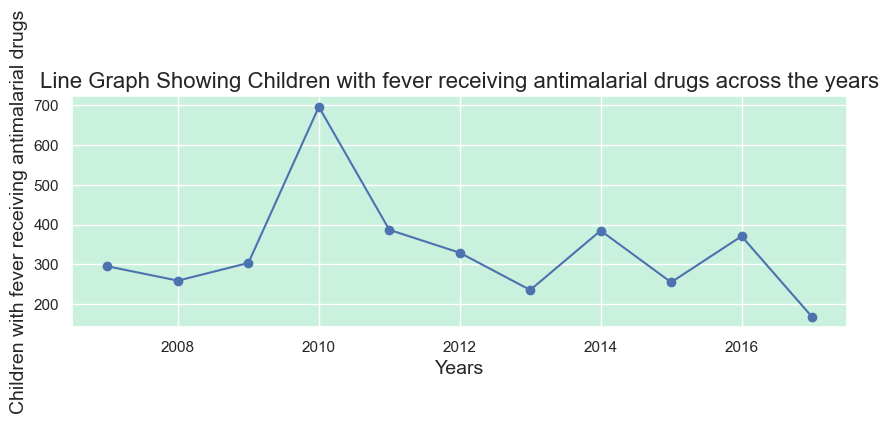

In [60]:
# Ensure that plots are displayed directly in the notebook
%matplotlib inline

# Assuming you have a Series or DataFrame named 'sum_malaria_incidence' containing malaria incidences over the years

# Create a line graph
plt.figure(figsize=(10, 3))

# Plot the line graph
plt.plot(Children.index, Children.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Children with fever receiving antimalarial drugs', fontsize=14)
plt.title('Line Graph Showing Children with fever receiving antimalarial drugs across the years', fontsize=16)

# Display the plot
plt.grid(True) 
plt.show()

Selecting a year from the dataset to study it and visaulize it

In [61]:
yearGroups = df.groupby(['Year'])

year2017 = yearGroups.get_group(2017)
year2017.reset_index(drop=True, inplace=True)
year2017.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2017,DZA,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,17.69,20.79,16.48,27.95,-0.05,72.05,2.87,93.56,88.69,95.44,87.59,82.21,89.67,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2017,AGO,228.91,3874892,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,35.16,1.38,64.84,4.39,55.84,27.44,71.24,49.88,23.23,64.33,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2017,BEN,399.56,1774022,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,53.23,1.74,46.77,3.91,66.41,58.22,75.75,16.45,7.62,26.51,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2017,BWA,2.05,1900,0.0,0.0,0.0,0.0,0.0,83.22,0.00,0.00,0.00,31.30,-0.35,68.70,3.19,90.34,75.53,97.09,77.27,50.60,89.42,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2017,BFA,399.94,10255415,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,71.26,2.04,28.74,5.03,47.89,34.99,79.86,19.40,11.34,39.38,12.238333,-1.561593,POINT (12.238333 -1.561593)


Dropping columns with 0.0 inorder to represent them for the Use of insecticide-treated bed nets (% of under-5 population) column

In [62]:
value_to_drop = 0.0
year2017 = df[df['Use of insecticide-treated bed nets (% of under-5 population)'] != value_to_drop]
year2017.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
1,Angola,2007,AGO,286.72,1533485,18.0,29.8,1.5,0.00,0.00,0.00,0.0,0.0,0.0,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
11,"Congo, Dem. Rep.",2007,COD,481.93,740858,6.0,29.8,2.5,0.00,0.00,0.00,0.0,0.0,0.0,61.53,2.45,38.47,4.57,37.80,18.57,68.54,20.52,19.04,22.88,-4.038333,21.758664,POINT (-4.038333 21.758664)
18,Eswatini,2007,SWZ,0.29,84,1.0,0.6,0.5,0.00,0.00,78.18,0.0,0.0,0.0,78.17,0.73,21.83,0.26,59.46,50.65,91.01,53.72,51.60,61.31,-26.522503,31.465866,POINT (-26.522503 31.465866)
19,Ethiopia,2007,ETH,121.69,451816,33.0,10.0,0.0,6.65,0.93,36.43,0.0,2.3,0.0,83.88,2.49,16.12,4.10,28.96,19.46,78.44,4.99,2.59,17.47,9.145000,40.489673,POINT (9.145 40.489673)
23,Guinea,2007,GIN,343.69,44518,5.0,74.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,67.18,1.82,32.82,3.10,63.16,52.44,85.10,15.00,8.50,28.32,9.945587,-9.696645,POINT (9.945587 -9.696645)


In [63]:
# Filter out the number of people at risk of getting malaria per country in 2017.
at_risk = year2017[['Country Name', 'Use of insecticide-treated bed nets (% of under-5 population)']]
at_risk.head()

,Country Name,Use of insecticide-treated bed nets (% of under-5 population)
1,Angola,18.0
11,"Congo, Dem. Rep.",6.0
18,Eswatini,1.0
19,Ethiopia,33.0
23,Guinea,5.0


A Bar showing Use of insecticide-treated bed nets (% of under-5 population)

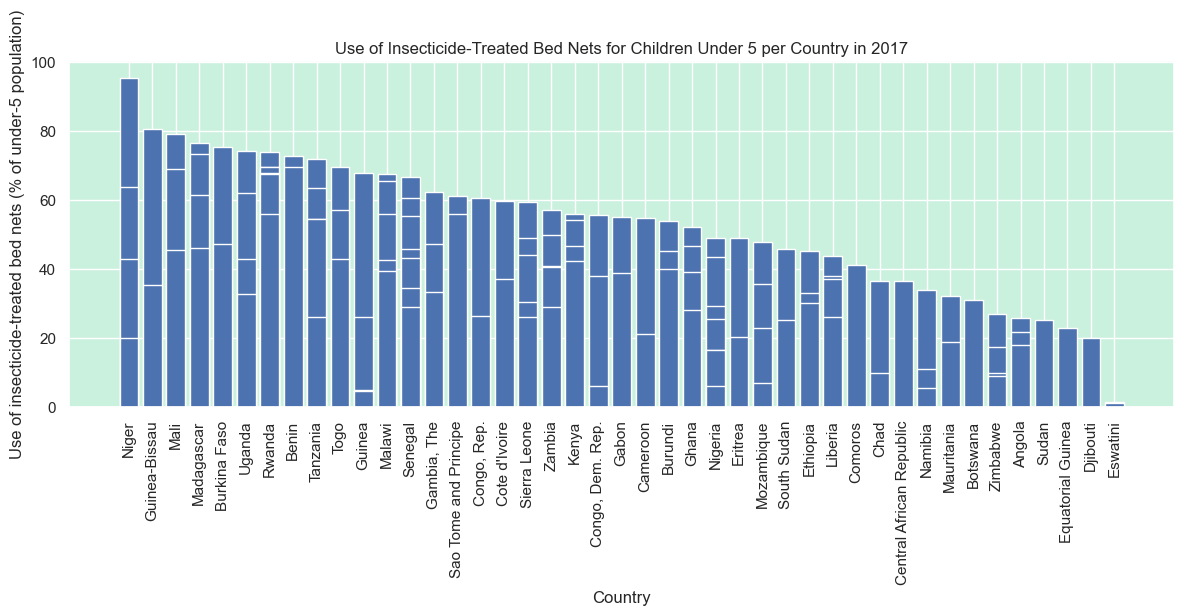

In [74]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Use of insecticide-treated bed nets (% of under-5 population)', ascending=False)

plt.bar(at_risk_sorted['Country Name'], at_risk_sorted['Use of insecticide-treated bed nets (% of under-5 population)'])
plt.xticks(rotation=90)  

plt.xlabel('Country')
plt.ylabel('Use of insecticide-treated bed nets (% of under-5 population)')
plt.title('Use of Insecticide-Treated Bed Nets for Children Under 5 per Country in 2017')
plt.tight_layout()

plt.show()


A line Graph showing Use of insecticide-treated bed nets (% of under-5 population for the first 10 countries

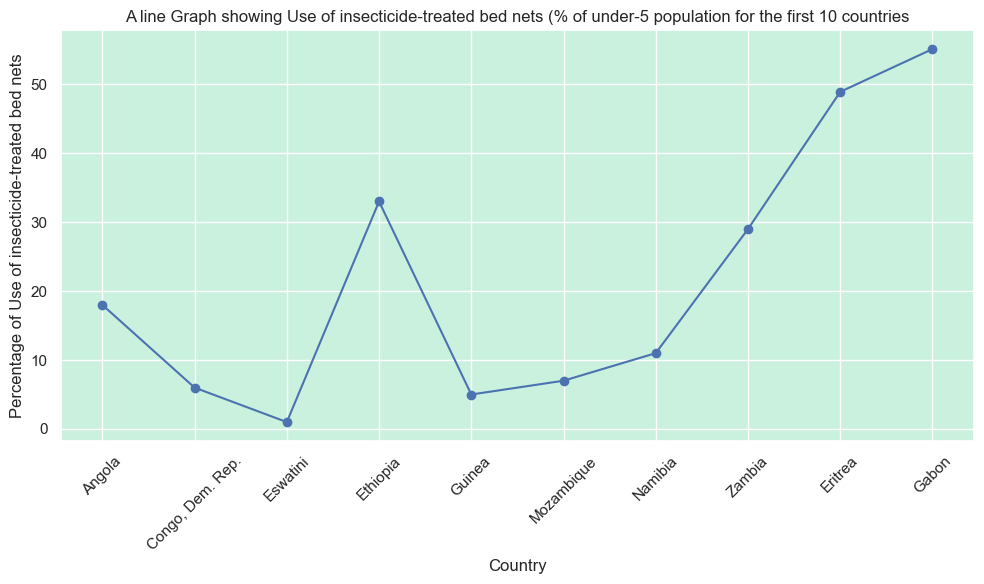

In [72]:
# Visualize the top 10 countries with inadequate sanitation facilitie
few = at_risk.head(10)
plt.figure(figsize=(10, 6))
plt.plot(few['Country Name'], few['Use of insecticide-treated bed nets (% of under-5 population)'], marker='o')

plt.title('A line Graph showing Use of insecticide-treated bed nets (% of under-5 population for the first 10 countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Use of insecticide-treated bed nets')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

An Area Chart showing Use of insecticide-treated bed nets (% of under-5 population)

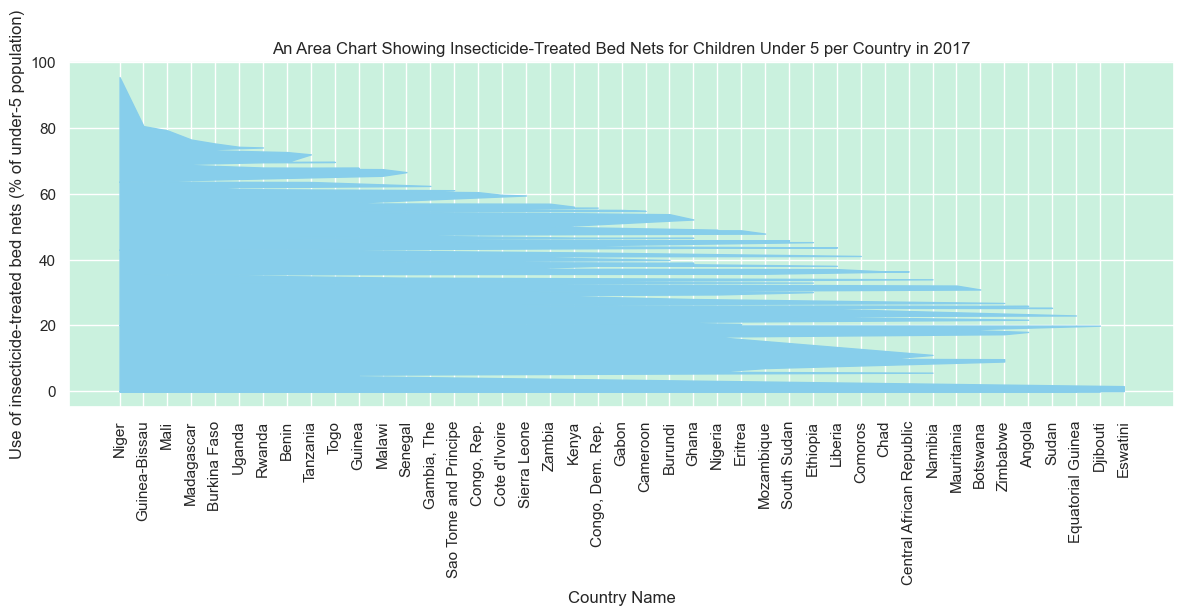

In [68]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Use of insecticide-treated bed nets (% of under-5 population)', ascending=False)

# Create an area chart
plt.fill_between(at_risk_sorted['Country Name'], at_risk_sorted['Use of insecticide-treated bed nets (% of under-5 population)'], color='skyblue')

# Set the x-axis labels to rotate 90 degrees
plt.xticks(rotation=90)

# Add a title and labels to the axes
plt.xlabel('Country Name')
plt.ylabel('Use of insecticide-treated bed nets (% of under-5 population)')
plt.title('An Area Chart Showing Insecticide-Treated Bed Nets for Children Under 5 per Country in 2017')
plt.tight_layout()

plt.show()

Dropping columns with 0.0 inorder to represent them for the Children with fever receiving antimalarial drugs (% of children under age 5 with fever) column

In [70]:
value_to_drop = 0.0
year2017 = df[df['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'] != value_to_drop]
year2017.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
1,Angola,2007,AGO,286.72,1533485,18.0,29.8,1.5,0.00,0.00,0.00,0.0,0.0,0.0,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
11,"Congo, Dem. Rep.",2007,COD,481.93,740858,6.0,29.8,2.5,0.00,0.00,0.00,0.0,0.0,0.0,61.53,2.45,38.47,4.57,37.80,18.57,68.54,20.52,19.04,22.88,-4.038333,21.758664,POINT (-4.038333 21.758664)
18,Eswatini,2007,SWZ,0.29,84,1.0,0.6,0.5,0.00,0.00,78.18,0.0,0.0,0.0,78.17,0.73,21.83,0.26,59.46,50.65,91.01,53.72,51.60,61.31,-26.522503,31.465866,POINT (-26.522503 31.465866)
19,Ethiopia,2007,ETH,121.69,451816,33.0,10.0,0.0,6.65,0.93,36.43,0.0,2.3,0.0,83.88,2.49,16.12,4.10,28.96,19.46,78.44,4.99,2.59,17.47,9.145000,40.489673,POINT (9.145 40.489673)
23,Guinea,2007,GIN,343.69,44518,5.0,74.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,67.18,1.82,32.82,3.10,63.16,52.44,85.10,15.00,8.50,28.32,9.945587,-9.696645,POINT (9.945587 -9.696645)


In [75]:
# Filter out the number of people at risk of getting malaria per country in 2017.
at_risk = year2017[['Country Name', 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)']]
at_risk.head()

,Country Name,Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
1,Angola,29.8
11,"Congo, Dem. Rep.",29.8
18,Eswatini,0.6
19,Ethiopia,10.0
23,Guinea,74.0


A Bar showing Children with fever receiving antimalarial drugs (% of children under age 5 with fever)

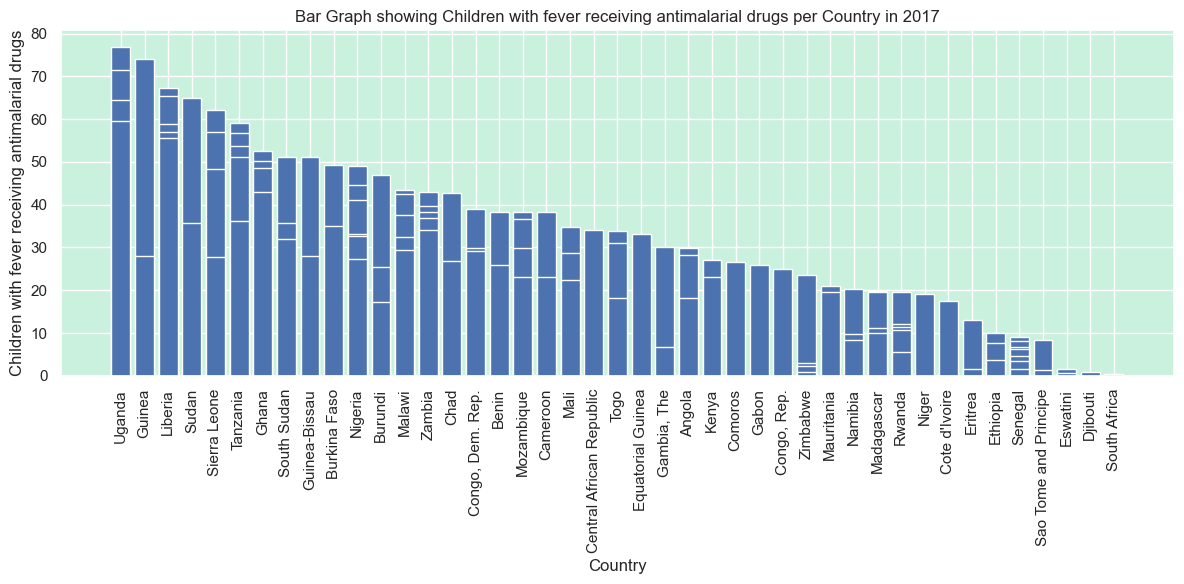

In [77]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', ascending=False)

plt.bar(at_risk_sorted['Country Name'], at_risk_sorted['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'])
plt.xticks(rotation=90)  

plt.xlabel('Country')
plt.ylabel('Children with fever receiving antimalarial drugs')
plt.title('Bar Graph showing Children with fever receiving antimalarial drugs per Country in 2017')
plt.tight_layout()

plt.show()

A line Graph showing Children with fever receiving antimalarial drugs (% of children under age 5 with fever) for the first 10 countries

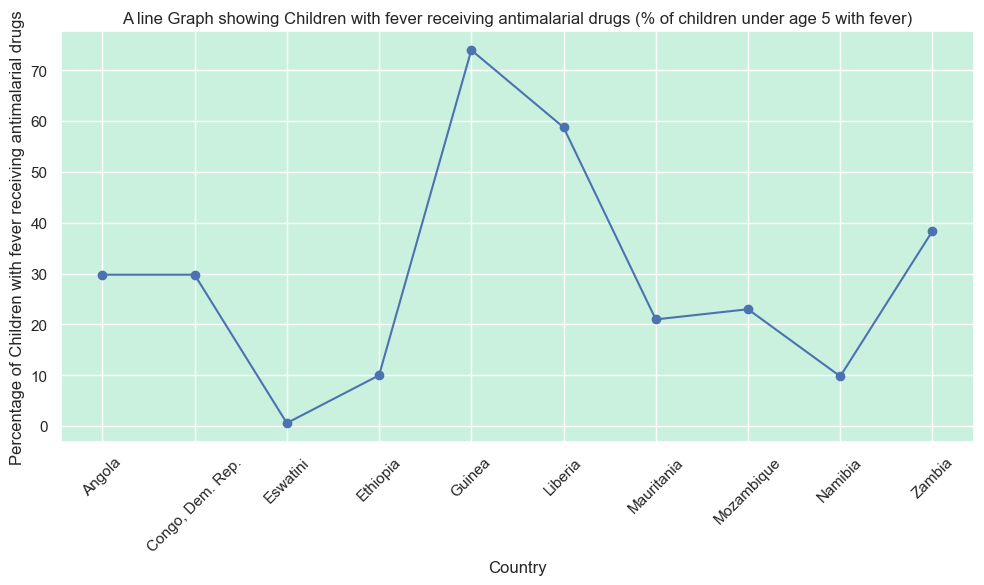

In [78]:
# Visualize the top 10 countries with inadequate sanitation facilitie
few = at_risk.head(10)
plt.figure(figsize=(10, 6))
plt.plot(few['Country Name'], few['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'], marker='o')

plt.title('A line Graph showing Children with fever receiving antimalarial drugs (% of children under age 5 with fever)')
plt.xlabel('Country')
plt.ylabel('Percentage of Children with fever receiving antimalarial drugs')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

An Area Chart showing Use of insecticide-treated bed nets (% of under-5 population)

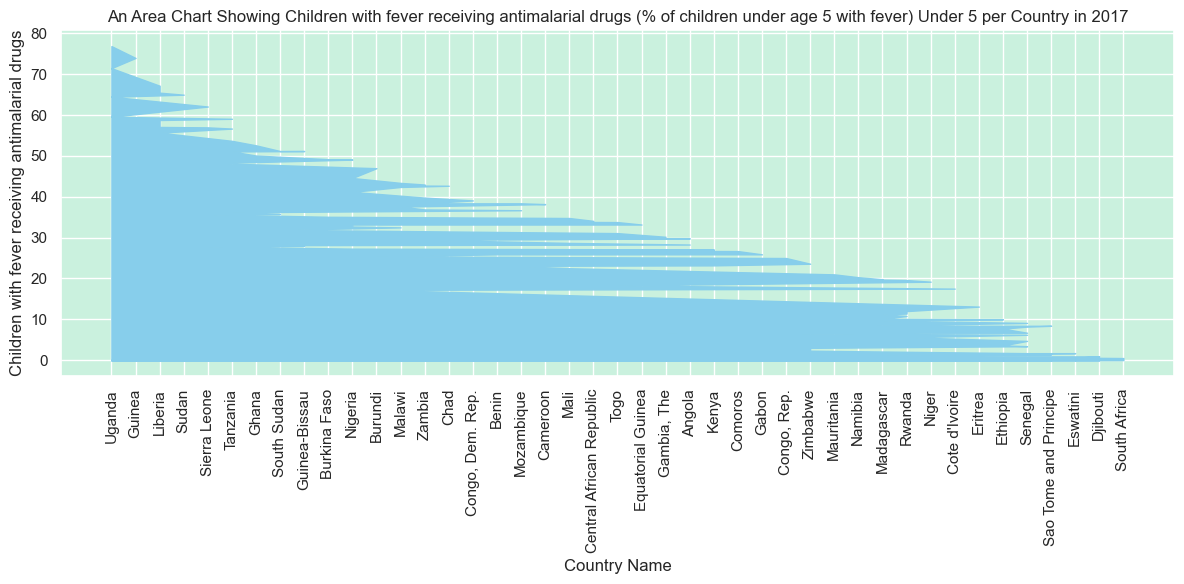

In [79]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', ascending=False)

# Create an area chart
plt.fill_between(at_risk_sorted['Country Name'], at_risk_sorted['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'], color='skyblue')

# Set the x-axis labels to rotate 90 degrees
plt.xticks(rotation=90)

# Add a title and labels to the axes
plt.xlabel('Country Name')
plt.ylabel('Children with fever receiving antimalarial drugs')
plt.title('An Area Chart Showing Children with fever receiving antimalarial drugs (% of children under age 5 with fever) Under 5 per Country in 2017')
plt.tight_layout()

plt.show()

Dropping columns with 0.0 inorder to represent them for the Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women) column

In [81]:
value_to_drop = 0.0
year2017 = df[df['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'] != value_to_drop]
year2017.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
1,Angola,2007,AGO,286.72,1533485,18.0,29.8,1.5,0.00,0.00,0.00,0.00,0.00,0.00,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
11,"Congo, Dem. Rep.",2007,COD,481.93,740858,6.0,29.8,2.5,0.00,0.00,0.00,0.00,0.00,0.00,61.53,2.45,38.47,4.57,37.80,18.57,68.54,20.52,19.04,22.88,-4.038333,21.758664,POINT (-4.038333 21.758664)
18,Eswatini,2007,SWZ,0.29,84,1.0,0.6,0.5,0.00,0.00,78.18,0.00,0.00,0.00,78.17,0.73,21.83,0.26,59.46,50.65,91.01,53.72,51.60,61.31,-26.522503,31.465866,POINT (-26.522503 31.465866)
36,Namibia,2007,NAM,12.97,4242,11.0,9.8,7.0,0.00,0.00,0.00,0.00,0.00,0.00,61.40,0.17,38.60,4.36,79.08,67.60,97.34,30.97,15.27,55.93,-22.957640,18.490410,POINT (-22.95764 18.49041)
38,Nigeria,2007,NGA,421.33,0,0.0,0.0,2.0,17.57,13.18,23.93,25.44,24.78,26.41,59.18,1.16,40.82,4.80,57.64,43.30,78.44,32.53,29.78,36.51,9.081999,8.675277,POINT (9.081999 8.675276999999999)


In [82]:
# Filter out the number of people at risk of getting malaria per country in 2017.
at_risk = year2017[['Country Name', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']]
at_risk.head()

,Country Name,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
1,Angola,1.5
11,"Congo, Dem. Rep.",2.5
18,Eswatini,0.5
36,Namibia,7.0
38,Nigeria,2.0


A Bar showing Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)

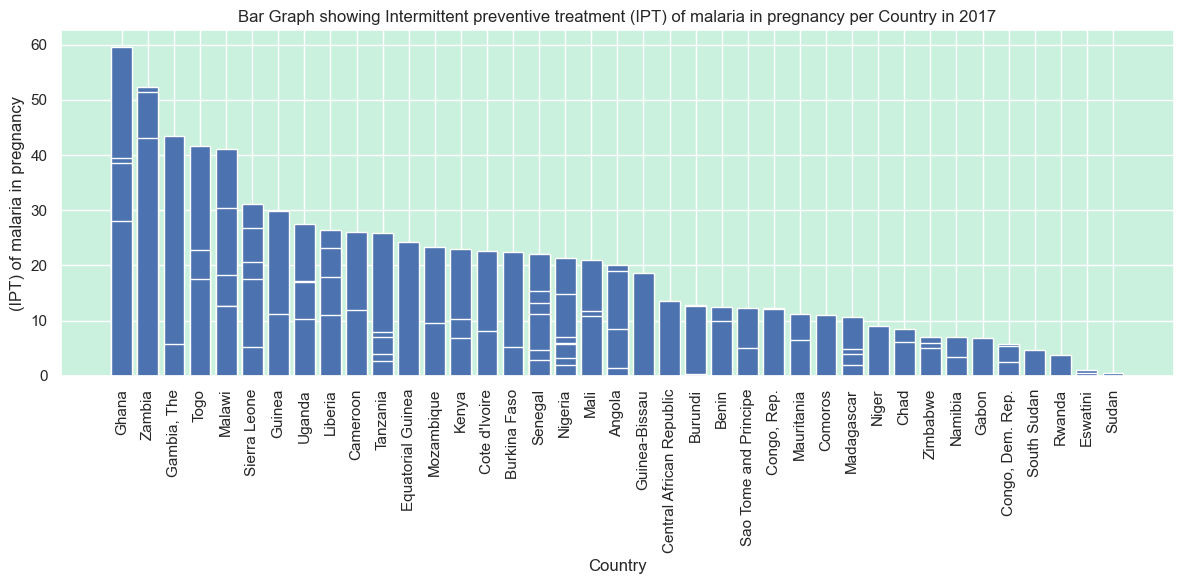

In [83]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', ascending=False)

plt.bar(at_risk_sorted['Country Name'], at_risk_sorted['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'])
plt.xticks(rotation=90)  

plt.xlabel('Country')
plt.ylabel('(IPT) of malaria in pregnancy')
plt.title('Bar Graph showing Intermittent preventive treatment (IPT) of malaria in pregnancy per Country in 2017')
plt.tight_layout()

plt.show()

A line Graph showing Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women) for the first 10 countries

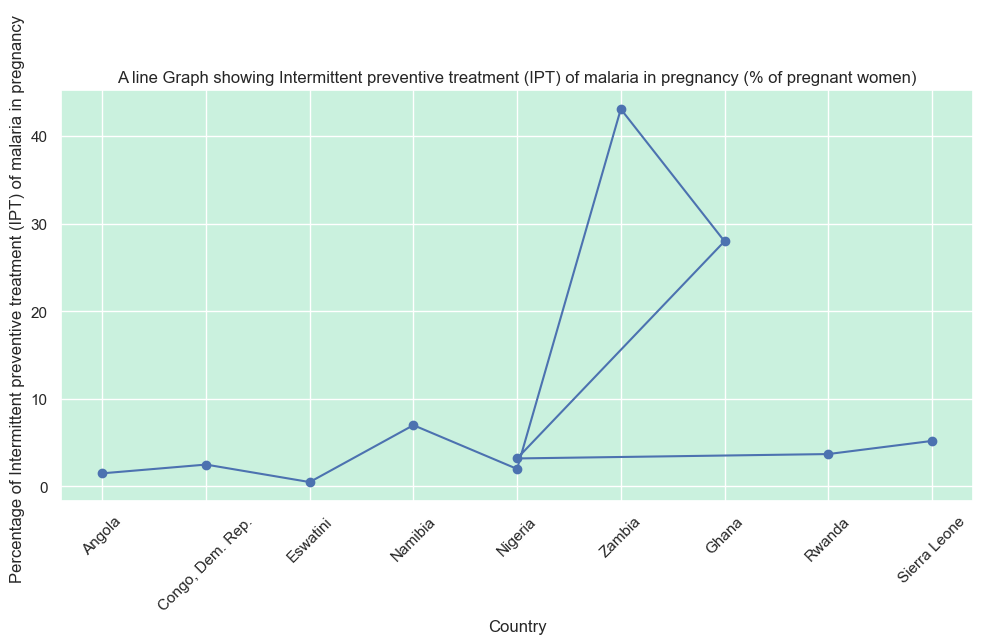

In [84]:
# Visualize the top 10 countries with inadequate sanitation facilitie
few = at_risk.head(10)
plt.figure(figsize=(10, 6))
plt.plot(few['Country Name'], few['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'], marker='o')

plt.title('A line Graph showing Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)')
plt.xlabel('Country')
plt.ylabel('Percentage of Intermittent preventive treatment (IPT) of malaria in pregnancy ')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

An Area Chart showing Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)

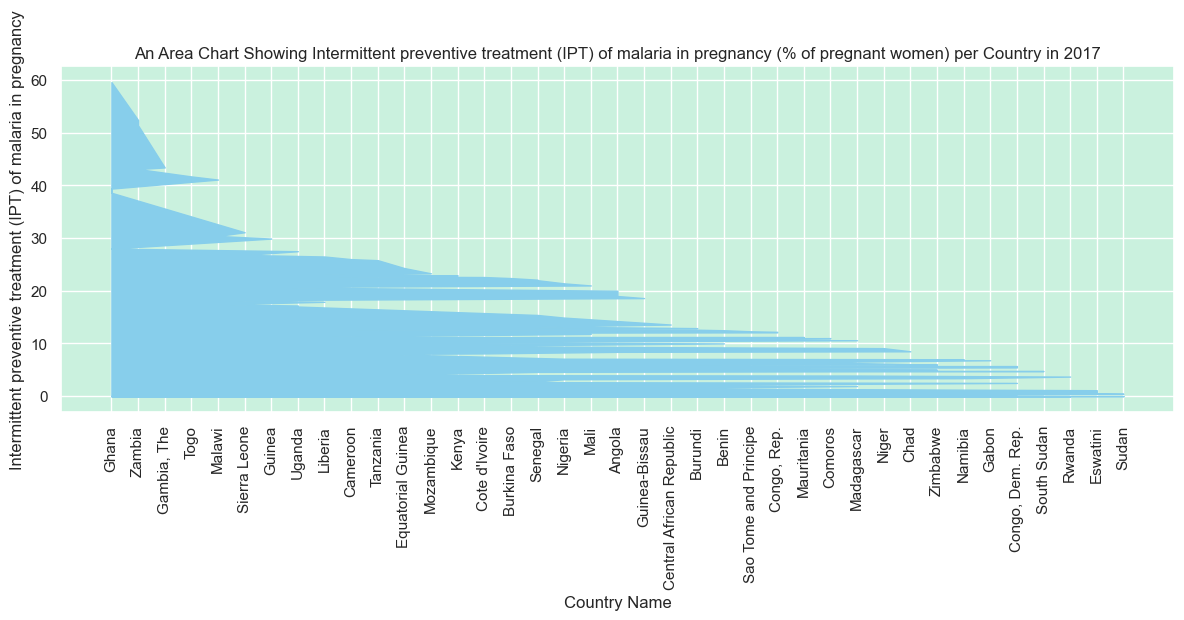

In [85]:
import matplotlib.pyplot as plt

# Assuming you have the 'at_risk_sorted' DataFrame with the relevant data
# If not, make sure to prepare the DataFrame with the required columns and data

plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', ascending=False)

# Create an area chart
plt.fill_between(at_risk_sorted['Country Name'], at_risk_sorted['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'], color='skyblue')

# Set the x-axis labels to rotate 90 degrees
plt.xticks(rotation=90)

# Add a title and labels to the axes
plt.xlabel('Country Name')
plt.ylabel('Intermittent preventive treatment (IPT) of malaria in pregnancy')
plt.title('An Area Chart Showing Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women) per Country in 2017')
plt.tight_layout()

plt.show()